In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import warnings
warnings.filterwarnings("ignore")
import pickle
# import miceforest as mf
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
pip uninstall matplotlib

Uninstalling matplotlib-3.4.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.4.0-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.4.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.4.0


In [ ]:
pip install matplotlib==3.1.3

  Using cached https://files.pythonhosted.org/packages/4c/9b/35ab3469fd1509f7636a344940569ebfd33239673fd2318e80b4700a257c/matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl
ERROR: miceforest 2.0.3 has requirement matplotlib>=3.3.0, but you'll have matplotlib 3.1.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [ ]:
# python -m pip uninstall matplotlib

In [ ]:
pip install miceforest

  Using cached https://files.pythonhosted.org/packages/83/ee/8d7e0149ecf95fae7e744c5a93f51a8c9f7a96c63691d10aed6d2c1d8735/matplotlib-3.4.0-cp37-cp37m-manylinux1_x86_64.whl
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3


In [ ]:
import miceforest as mf

In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/College Capstone Project

/content/drive/MyDrive/College Capstone Project


In [ ]:
SchoolDF = pd.read_csv('Most-Recent-Cohorts-All-Data-Elements.csv')

In [ ]:
SchoolDF.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,SCH_DEG,HCM2,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,ST_FIPS,REGION,LOCALE,LOCALE2,LATITUDE,LONGITUDE,CCBASIC,CCUGPROF,CCSIZSET,HBCU,PBI,ANNHI,TRIBAL,AANAPII,HSI,NANTI,MENONLY,WOMENONLY,RELAFFIL,ADM_RATE,ADM_RATE_ALL,SATVR25,SATVR75,...,OMENRAP_NOTFIRSTTIME,OMAWDP8_NOTFIRSTTIME,OMENRUP_NOTFIRSTTIME,OMENRYP_FULLTIME,OMENRAP_FULLTIME,OMAWDP8_FULLTIME,OMENRUP_FULLTIME,OMENRYP_PARTTIME,OMENRAP_PARTTIME,OMAWDP8_PARTTIME,OMENRUP_PARTTIME,OMENRYP_ALL_POOLED_SUPP,OMENRAP_ALL_POOLED_SUPP,OMAWDP8_ALL_POOLED_SUPP,OMENRUP_ALL_POOLED_SUPP,OMENRYP_FIRSTTIME_POOLED_SUPP,OMENRAP_FIRSTTIME_POOLED_SUPP,OMAWDP8_FIRSTTIME_POOLED_SUPP,OMENRUP_FIRSTTIME_POOLED_SUPP,OMENRYP_NOTFIRSTTIME_POOLED_SUPP,OMENRAP_NOTFIRSTTIME_POOLED_SUPP,OMAWDP8_NOTFIRSTTIME_POOLED_SUPP,OMENRUP_NOTFIRSTTIME_POOLED_SUPP,OMENRYP_FULLTIME_POOLED_SUPP,OMENRAP_FULLTIME_POOLED_SUPP,OMAWDP8_FULLTIME_POOLED_SUPP,OMENRUP_FULLTIME_POOLED_SUPP,OMENRYP_PARTTIME_POOLED_SUPP,OMENRAP_PARTTIME_POOLED_SUPP,OMAWDP8_PARTTIME_POOLED_SUPP,OMENRUP_PARTTIME_POOLED_SUPP,FTFTPCTPELL,FTFTPCTFLOAN,UG12MN,G12MN,SCUGFFN,POOLYRS_FTFTAIDPCT,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,3.0,0,1,1,3,4,1,1,5,12.0,NaN,34.783368,-86.568502,18.0,10.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.8986,0.8986,430.0,520.0,...,0.3298,0.4539,0.2128,0.0153,0.3850,0.3624,0.2373,0.0104,0.4531,0.1302,0.4063,0.0208,0.4001,0.3433,0.2359,0.0243,0.4167,0.3174,0.2415,0.0103,0.3505,0.4201,0.2191,0.0205,0.3911,0.3668,0.2216,0.0222,0.4523,0.2062,0.3193,0.7057,0.7143,5343.0,1165.0,1288.0,2.0,0.7083,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu,https://uab.studentaidcalculator.com/survey.aspx,3.0,0,1,1,3,4,1,1,5,12.0,NaN,33.505697,-86.799345,15.0,9.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.9211,0.9211,490.0,620.0,...,0.1928,0.5438,0.2523,0.0113,0.2225,0.5706,0.1956,0.0198,0.2129,0.4323,0.3350,0.0675,0.2424,0.5452,0.1448,0.07,0.262,0.5541,0.1138,0.0651,0.2237,0.5367,0.1744,0.0615,0.2434,0.5713,0.1237,0.0969,0.2377,0.4179,0.2475,0.3788,0.5350,14445.0,10498.0,2228.0,2.0,0.3891,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,3.0,0,1,1,3,4,2,1,5,12.0,NaN,32.362609,-86.174010,20.0,5.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,NaN,NaN,NaN,NaN,...,0.0000,0.3043,0.6957,0.0000,0.0000,0.3607,0.6393,0.0000,0.0000,0.5000,0.5000,0.0109,0.1766,0.3995,0.413,0.0333,0.4,0.3667,0.2,0.0118,0.177,0.3835,0.4277,0.0066,0.1661,0.3854,0.4419,0.0299,0.2239,0.4627,0.2836,1.0000,1.0000,440.0,527.0,5.0,4.0,PrivacySuppressed,PrivacySuppressed,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,3.0,0,1,1,3,4,1,1,5,12.0,NaN,34.724557,-86.640449,16.0,15.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.8087,0.8087,560.0,700.0,...,0.2882,0.5048,0.1878,0.0160,0.2859,0.5384,0.1597,0.0414,0.4034,0.3138,0.2414,0.0185,0.3115,0.5065,0.1635,0.0235,0.3351,0.501,0.1404,0.0145,0.2929,0.5108,0.1818,0.0161,0.2958,0.5432,0.1449,0.0292,0.3841,0.3371,0.2496,0.2707,0.4556,8145.0,2443.0,1341.0,2.0,0.2378,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/tuition-costs/net-price...,3.0,0,1,1,3,4,1,1,5,12.0,NaN,32.364317,-86.295677,19.0,10.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.9774,0.9774,440.0,520.0,...,0.3647,0.4294,0.1941,0.0133,0.4187,0.2994,0.2687,0.0889,0.3556,0.2444,0.3111,0.0259,0.4635,0.308,0.2026,0.026,0.469

In [ ]:
SchoolDF.shape

(6806, 1986)

In [ ]:
SchoolDF_sub = SchoolDF[['INSTNM', 'STABBR', 'CONTROL', 'HIGHDEG', 
                                    'PCIP11', 'COSTT4_A', 'COSTT4_P', 
                                    'UGDS', 'UGDS_WOMEN', 'UGDS_NRA', 'AGE_ENTRY', 'COMP_ORIG_YR4_RT',
                                    'MEDIAN_HH_INC', 'PCTFLOAN', 'MD_EARN_WNE_P8', 'GRAD_DEBT_MDN', 'CDR3', 'COMPL_RPY_3YR_RT']]

In [ ]:
SchoolDF_sub.head()

,INSTNM,STABBR,CONTROL,HIGHDEG,PCIP11,COSTT4_A,COSTT4_P,UGDS,UGDS_WOMEN,UGDS_NRA,AGE_ENTRY,COMP_ORIG_YR4_RT,MEDIAN_HH_INC,PCTFLOAN,MD_EARN_WNE_P8,GRAD_DEBT_MDN,CDR3,COMPL_RPY_3YR_RT
0,Alabama A & M University,AL,1,4,0.0592,22489.0,NaN,4990.0,0.5924,0.0070,20.283741368,0.190821256039,49720.22,0.7503,27100,34500,0.182,0.429326288
1,University of Alabama at Birmingham,AL,1,4,0.0139,24347.0,NaN,13186.0,0.6070,0.0213,23.60797466,0.453967065868,55735.22,0.5127,38300,22500,0.057,0.6182700794
2,Amridge University,AL,2,4,0.0000,17680.0,NaN,351.0,0.6809,0.0000,33.672297297,0.117073170732,53683.7,0.8962,38300,25002,0.110,0.4390243902
3,University of Alabama in Huntsville,AL,1,4,0.0590,23441.0,NaN,7458.0,0.4204,0.0223,22.727919632,0.449378330373,58688.62,0.4192,41800,22021,0.059,0.680887372
4,Alabama State University,AL,1,4,0.0585,21476.0,NaN,3903.0,0.6290,0.0102,20.130990415,0.210443037975,46065.2,0.7845,25200,32637,0.203,0.3660377358


In [ ]:
SchoolDF_sub.rename(columns={'STABBR' : 'STATE', 'PCIP11' : 'CSDEG', 'COSTT4_A' : 'COSTA', 'COSTT4_P' : 'COSTP'}, inplace=True)

In [ ]:
SchoolDF_sub.head()

,INSTNM,STATE,CONTROL,HIGHDEG,CSDEG,COSTA,COSTP,UGDS,UGDS_WOMEN,UGDS_NRA,AGE_ENTRY,COMP_ORIG_YR4_RT,MEDIAN_HH_INC,PCTFLOAN,MD_EARN_WNE_P8,GRAD_DEBT_MDN,CDR3,COMPL_RPY_3YR_RT
0,Alabama A & M University,AL,1,4,0.0592,22489.0,NaN,4990.0,0.5924,0.0070,20.283741368,0.190821256039,49720.22,0.7503,27100,34500,0.182,0.429326288
1,University of Alabama at Birmingham,AL,1,4,0.0139,24347.0,NaN,13186.0,0.6070,0.0213,23.60797466,0.453967065868,55735.22,0.5127,38300,22500,0.057,0.6182700794
2,Amridge University,AL,2,4,0.0000,17680.0,NaN,351.0,0.6809,0.0000,33.672297297,0.117073170732,53683.7,0.8962,38300,25002,0.110,0.4390243902
3,University of Alabama in Huntsville,AL,1,4,0.0590,23441.0,NaN,7458.0,0.4204,0.0223,22.727919632,0.449378330373,58688.62,0.4192,41800,22021,0.059,0.680887372
4,Alabama State University,AL,1,4,0.0585,21476.0,NaN,3903.0,0.6290,0.0102,20.130990415,0.210443037975,46065.2,0.7845,25200,32637,0.203,0.3660377358


In [ ]:
SchoolDF_sub['CONTROL'].replace({1 : 'Public', 2 : 'Private nonprofit', 3 : 'Private for-profit'}, inplace=True)

In [ ]:
SchoolDF_sub['HIGHDEG'].replace({0 : "Non-degree-granting" , 1 : "Certificate degree", 2 : "Associate degree", 3 : "Bachelor's degree", 4 : "Graduate degree"}, inplace=True)

In [ ]:
SchoolDF_sub.head()

,INSTNM,STATE,CONTROL,HIGHDEG,CSDEG,COSTA,COSTP,UGDS,UGDS_WOMEN,UGDS_NRA,AGE_ENTRY,COMP_ORIG_YR4_RT,MEDIAN_HH_INC,PCTFLOAN,MD_EARN_WNE_P8,GRAD_DEBT_MDN,CDR3,COMPL_RPY_3YR_RT
0,Alabama A & M University,AL,Public,Graduate degree,0.0592,22489.0,NaN,4990.0,0.5924,0.0070,20.283741368,0.190821256039,49720.22,0.7503,27100,34500,0.182,0.429326288
1,University of Alabama at Birmingham,AL,Public,Graduate degree,0.0139,24347.0,NaN,13186.0,0.6070,0.0213,23.60797466,0.453967065868,55735.22,0.5127,38300,22500,0.057,0.6182700794
2,Amridge University,AL,Private nonprofit,Graduate degree,0.0000,17680.0,NaN,351.0,0.6809,0.0000,33.672297297,0.117073170732,53683.7,0.8962,38300,25002,0.110,0.4390243902
3,University of Alabama in Huntsville,AL,Public,Graduate degree,0.0590,23441.0,NaN,7458.0,0.4204,0.0223,22.727919632,0.449378330373,58688.62,0.4192,41800,22021,0.059,0.680887372
4,Alabama State University,AL,Public,Graduate degree,0.0585,21476.0,NaN,3903.0,0.6290,0.0102,20.130990415,0.210443037975,46065.2,0.7845,25200,32637,0.203,0.3660377358


In [ ]:
SchoolDF_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6806 entries, 0 to 6805
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   INSTNM            6806 non-null   object 
 1   STATE             6806 non-null   object 
 2   CONTROL           6806 non-null   object 
 3   HIGHDEG           6806 non-null   object 
 4   CSDEG             6036 non-null   float64
 5   COSTA             3431 non-null   float64
 6   COSTP             2175 non-null   float64
 7   UGDS              6041 non-null   float64
 8   UGDS_WOMEN        6041 non-null   float64
 9   UGDS_NRA          6041 non-null   float64
 10  AGE_ENTRY         6304 non-null   object 
 11  COMP_ORIG_YR4_RT  6415 non-null   object 
 12  MEDIAN_HH_INC     4758 non-null   object 
 13  PCTFLOAN          6014 non-null   float64
 14  MD_EARN_WNE_P8    5503 non-null   object 
 15  GRAD_DEBT_MDN     6518 non-null   object 
 16  CDR3              5879 non-null   float64


In [ ]:
SchoolDF_sub.COSTA[(SchoolDF_sub['COSTA'].isna()) & (~SchoolDF_sub['COSTP'].isna())] = 0

In [ ]:
SchoolDF_sub.COSTP[(~SchoolDF_sub['COSTA'].isna()) & (SchoolDF_sub['COSTP'].isna())] = 0

In [ ]:
SchoolDF_sub['ATDCOST'] = SchoolDF_sub['COSTA'] + SchoolDF_sub['COSTP']

In [ ]:
SchoolDF_sub.describe()

,CSDEG,COSTA,COSTP,UGDS,UGDS_WOMEN,UGDS_NRA,PCTFLOAN,CDR3,ATDCOST
count,6036.000000,5606.000000,5606.000000,6041.000000,6041.000000,6041.000000,6014.000000,5879.000000,5606.000000
mean,0.023476,16498.236354,7848.567071,2522.160735,0.644250,0.021385,0.462107,0.107210,24346.803425
std,0.066010,18054.373922,10747.781573,5657.459316,0.244392,0.063130,0.279112,0.074038,13507.553184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1480.000000
25%,0.000000,0.000000,0.000000,105.000000,0.527600,0.000000,0.227700,0.049000,14751.250000
50%,0.000000,12684.000000,0.000000,438.000000,0.627600,0.000000,0.514900,0.096000,20742.000000
75%,0.026625,25776.500000,17535.750000,2117.000000,0.857100,0.017300,0.680250,0.151000,28710.750000
max,1.000000,96375.000000,116377.000000,88921.000000,1.000000,1.000000,1.000000,0.666000,116377.000000


In [ ]:
SchoolDF_sub.drop(['CSDEG', 'UGDS_NRA'], 1, inplace=True)

In [ ]:
SchoolDF_sub[SchoolDF_sub.duplicated()]

,INSTNM,STATE,CONTROL,HIGHDEG,COSTA,COSTP,UGDS,UGDS_WOMEN,AGE_ENTRY,COMP_ORIG_YR4_RT,MEDIAN_HH_INC,PCTFLOAN,MD_EARN_WNE_P8,GRAD_DEBT_MDN,CDR3,COMPL_RPY_3YR_RT,ATDCOST


In [ ]:
# SchoolDF_sub[~(SchoolDF_sub.PCTFLOAN == "0" & (SchoolDF_sub.GRAD_DEBT_MDN == "PrivacySuppressed" | SchoolDF_sub.GRAD_DEBT_MDN == "NULL") 
#                                         & (SchoolDF_sub.COMPL_RPY_3YR_RT == "NULL" | SchoolDF_sub.COMPL_RPY_3YR_RT == "PrivacySuppressed"))]

In [ ]:
SchoolDF_sub.shape

(6806, 17)

In [ ]:
SchoolDF_sub = SchoolDF_sub[~((SchoolDF_sub['GRAD_DEBT_MDN'].isin(['PrivacySuppressed', 'NULL'])) 
  & (SchoolDF_sub['COMPL_RPY_3YR_RT'].isin(['NULL', 'PrivacySuppressed'])))]

In [ ]:
SchoolDF_sub.head()

,INSTNM,STATE,CONTROL,HIGHDEG,COSTA,COSTP,UGDS,UGDS_WOMEN,AGE_ENTRY,COMP_ORIG_YR4_RT,MEDIAN_HH_INC,PCTFLOAN,MD_EARN_WNE_P8,GRAD_DEBT_MDN,CDR3,COMPL_RPY_3YR_RT,ATDCOST
0,Alabama A & M University,AL,Public,Graduate degree,22489.0,0.0,4990.0,0.5924,20.283741368,0.190821256039,49720.22,0.7503,27100,34500,0.182,0.429326288,22489.0
1,University of Alabama at Birmingham,AL,Public,Graduate degree,24347.0,0.0,13186.0,0.6070,23.60797466,0.453967065868,55735.22,0.5127,38300,22500,0.057,0.6182700794,24347.0
2,Amridge University,AL,Private nonprofit,Graduate degree,17680.0,0.0,351.0,0.6809,33.672297297,0.117073170732,53683.7,0.8962,38300,25002,0.110,0.4390243902,17680.0
3,University of Alabama in Huntsville,AL,Public,Graduate degree,23441.0,0.0,7458.0,0.4204,22.727919632,0.449378330373,58688.62,0.4192,41800,22021,0.059,0.680887372,23441.0
4,Alabama State University,AL,Public,Graduate degree,21476.0,0.0,3903.0,0.6290,20.130990415,0.210443037975,46065.2,0.7845,25200,32637,0.203,0.3660377358,21476.0


In [ ]:
ps_count = (SchoolDF_sub == 'PrivacySuppressed').sum().reset_index().rename(columns={0 : 'count'})
ps_count_feat = ps_count.loc[ps_count['count']>0]['index'].tolist()

In [ ]:
SchoolDF_sub.replace('PrivacySuppressed', 0, inplace=True)

In [ ]:
cols = ['AGE_ENTRY', 'COMP_ORIG_YR4_RT', 'MEDIAN_HH_INC', 'MD_EARN_WNE_P8', 'GRAD_DEBT_MDN', 'COMPL_RPY_3YR_RT']
for col in cols:
  SchoolDF_sub[col] = pd.to_numeric(SchoolDF_sub[col])

<AxesSubplot:>

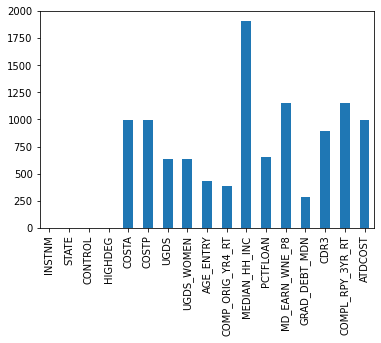

In [ ]:
SchoolDF_sub.isnull().sum().plot.bar()

In [ ]:
SchoolDF_sub['CountNA'] = SchoolDF_sub.isnull().sum(axis=1)

In [ ]:
SchoolDF_sub2 = SchoolDF_sub[SchoolDF_sub['CountNA']<=5]

In [ ]:
SchoolDF_sub2.head()

,INSTNM,STATE,CONTROL,HIGHDEG,COSTA,COSTP,UGDS,UGDS_WOMEN,AGE_ENTRY,COMP_ORIG_YR4_RT,MEDIAN_HH_INC,PCTFLOAN,MD_EARN_WNE_P8,GRAD_DEBT_MDN,CDR3,COMPL_RPY_3YR_RT,ATDCOST,CountNA
0,Alabama A & M University,AL,Public,Graduate degree,22489.0,0.0,4990.0,0.5924,20.283741,0.190821,49720.22,0.7503,27100.0,34500.0,0.182,0.429326,22489.0,0
1,University of Alabama at Birmingham,AL,Public,Graduate degree,24347.0,0.0,13186.0,0.6070,23.607975,0.453967,55735.22,0.5127,38300.0,22500.0,0.057,0.618270,24347.0,0
2,Amridge University,AL,Private nonprofit,Graduate degree,17680.0,0.0,351.0,0.6809,33.672297,0.117073,53683.70,0.8962,38300.0,25002.0,0.110,0.439024,17680.0,0
3,University of Alabama in Huntsville,AL,Public,Graduate degree,23441.0,0.0,7458.0,0.4204,22.727920,0.449378,58688.62,0.4192,41800.0,22021.0,0.059,0.680887,23441.0,0
4,Alabama State University,AL,Public,Graduate degree,21476.0,0.0,3903.0,0.6290,20.130990,0.210443,46065.20,0.7845,25200.0,32637.0,0.203,0.366038,21476.0,0


Text(0.5, 1.0, 'Distribution of enrollment at different schools')

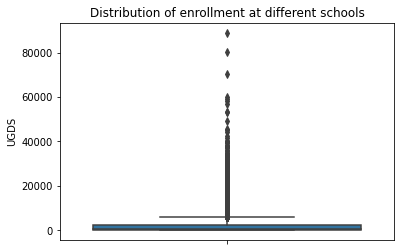

In [ ]:
sns.boxplot(y=SchoolDF_sub2['UGDS'])
plt.title('Distribution of enrollment at different schools')

In [ ]:
SchoolDF_sub2['UGDS'].describe()

count     5456.000000
mean      2742.508065
std       5883.274393
min          0.000000
25%        134.000000
50%        579.000000
75%       2412.750000
max      88921.000000
Name: UGDS, dtype: float64

(array([5.01e+03, 2.70e+02, 1.02e+02, 4.90e+01, 1.30e+01, 5.00e+00,
        4.00e+00, 1.00e+00, 0.00e+00, 2.00e+00]),
 array([    0. ,  8892.1, 17784.2, 26676.3, 35568.4, 44460.5, 53352.6,
        62244.7, 71136.8, 80028.9, 88921. ]),
 <BarContainer object of 10 artists>)

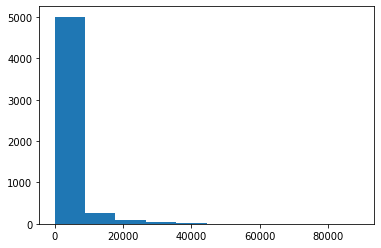

In [ ]:
plt.hist(SchoolDF_sub2['UGDS'])

In [ ]:
def inst_ensize(val):
  if val <= 150:
    return "Very Small"
  elif val > 150 and val <= 500:
    return "Small"
  elif val > 500 and val <= 2500:
    return "Medium"
  elif val > 2500 and val <= 5000:
    return "Large"
  elif val > 5000:
    return "Very Large"

In [ ]:
SchoolDF_sub2['INST_ENSIZE'] = SchoolDF_sub2.apply(lambda x: inst_ensize(x['UGDS']), axis=1)

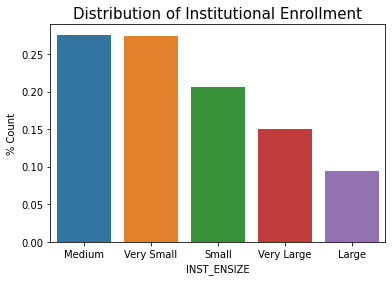

In [ ]:
inst_size = SchoolDF_sub2['INST_ENSIZE'].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y='INST_ENSIZE', data=inst_size)
plt.title('Distribution of Institutional Enrollment', fontsize=15)
plt.xlabel('INST_ENSIZE')
plt.ylabel('% Count')
plt.show()

In [ ]:
df_num = SchoolDF_sub2.select_dtypes('number').drop(['CountNA'], 1)

In [ ]:
df_num.head()

,COSTA,COSTP,UGDS,UGDS_WOMEN,AGE_ENTRY,COMP_ORIG_YR4_RT,MEDIAN_HH_INC,PCTFLOAN,MD_EARN_WNE_P8,GRAD_DEBT_MDN,CDR3,COMPL_RPY_3YR_RT,ATDCOST
0,22489.0,0.0,4990.0,0.5924,20.283741,0.190821,49720.22,0.7503,27100.0,34500.0,0.182,0.429326,22489.0
1,24347.0,0.0,13186.0,0.6070,23.607975,0.453967,55735.22,0.5127,38300.0,22500.0,0.057,0.618270,24347.0
2,17680.0,0.0,351.0,0.6809,33.672297,0.117073,53683.70,0.8962,38300.0,25002.0,0.110,0.439024,17680.0
3,23441.0,0.0,7458.0,0.4204,22.727920,0.449378,58688.62,0.4192,41800.0,22021.0,0.059,0.680887,23441.0
4,21476.0,0.0,3903.0,0.6290,20.130990,0.210443,46065.20,0.7845,25200.0,32637.0,0.203,0.366038,21476.0


In [ ]:
# Create kernels. 
kernel = mf.MultipleImputedKernel(
  data=df_num,
  save_all_iterations=True,
  random_state=1991
)

# Run the MICE algorithm for 3 iterations on each of the datasets
kernel.mice(3,verbose=True)

Dataset 0
1  | COSTA | COSTP | UGDS | UGDS_WOMEN | AGE_ENTRY | COMP_ORIG_YR4_RT | MEDIAN_HH_INC | MD_EARN_WNE_P8 | GRAD_DEBT_MDN | CDR3 | COMPL_RPY_3YR_RT | ATDCOST
2  | COSTA | COSTP | UGDS | UGDS_WOMEN | AGE_ENTRY | COMP_ORIG_YR4_RT | MEDIAN_HH_INC | MD_EARN_WNE_P8 | GRAD_DEBT_MDN | CDR3 | COMPL_RPY_3YR_RT | ATDCOST
3  | COSTA | COSTP | UGDS | UGDS_WOMEN | AGE_ENTRY | COMP_ORIG_YR4_RT | MEDIAN_HH_INC | MD_EARN_WNE_P8 | GRAD_DEBT_MDN | CDR3 | COMPL_RPY_3YR_RT | ATDCOST
Dataset 1
1  | COSTA | COSTP | UGDS | UGDS_WOMEN | AGE_ENTRY | COMP_ORIG_YR4_RT | MEDIAN_HH_INC | MD_EARN_WNE_P8 | GRAD_DEBT_MDN | CDR3 | COMPL_RPY_3YR_RT | ATDCOST
2  | COSTA | COSTP | UGDS | UGDS_WOMEN | AGE_ENTRY | COMP_ORIG_YR4_RT | MEDIAN_HH_INC | MD_EARN_WNE_P8 | GRAD_DEBT_MDN | CDR3 | COMPL_RPY_3YR_RT | ATDCOST
3  | COSTA | COSTP | UGDS | UGDS_WOMEN | AGE_ENTRY | COMP_ORIG_YR4_RT | MEDIAN_HH_INC | MD_EARN_WNE_P8 | GRAD_DEBT_MDN | CDR3 | COMPL_RPY_3YR_RT | ATDCOST
Dataset 2
1  | COSTA | COSTP | UGDS | UGDS_WOMEN |

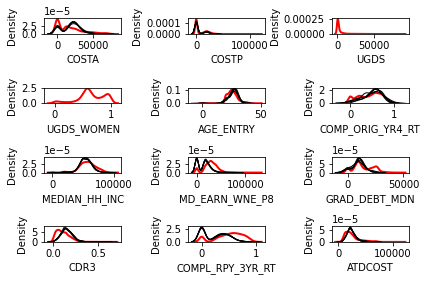

In [ ]:
kernel.plot_imputed_distributions()
plt.tight_layout()

In [ ]:
df_num_imputed = kernel.impute_new_data(df_num).complete_data(0)

In [ ]:
SchoolDF_sub3 = pd.concat([SchoolDF_sub2.select_dtypes('object'), df_num_imputed], axis=1)

In [ ]:
SchoolDF_sub3.head()

,INSTNM,STATE,CONTROL,HIGHDEG,INST_ENSIZE,COSTA,COSTP,UGDS,UGDS_WOMEN,AGE_ENTRY,COMP_ORIG_YR4_RT,MEDIAN_HH_INC,PCTFLOAN,MD_EARN_WNE_P8,GRAD_DEBT_MDN,CDR3,COMPL_RPY_3YR_RT,ATDCOST
0,Alabama A & M University,AL,Public,Graduate degree,Large,22489.0,0.0,4990.0,0.5924,20.283741,0.190821,49720.22,0.7503,27100.0,34500.0,0.182,0.429326,22489.0
1,University of Alabama at Birmingham,AL,Public,Graduate degree,Very Large,24347.0,0.0,13186.0,0.6070,23.607975,0.453967,55735.22,0.5127,38300.0,22500.0,0.057,0.618270,24347.0
2,Amridge University,AL,Private nonprofit,Graduate degree,Small,17680.0,0.0,351.0,0.6809,33.672297,0.117073,53683.70,0.8962,38300.0,25002.0,0.110,0.439024,17680.0
3,University of Alabama in Huntsville,AL,Public,Graduate degree,Very Large,23441.0,0.0,7458.0,0.4204,22.727920,0.449378,58688.62,0.4192,41800.0,22021.0,0.059,0.680887,23441.0
4,Alabama State University,AL,Public,Graduate degree,Large,21476.0,0.0,3903.0,0.6290,20.130990,0.210443,46065.20,0.7845,25200.0,32637.0,0.203,0.366038,21476.0


In [ ]:
SchoolDF_sub3.isnull().sum()

INSTNM              0
STATE               0
CONTROL             0
HIGHDEG             0
INST_ENSIZE         1
COSTA               0
COSTP               0
UGDS                0
UGDS_WOMEN          0
AGE_ENTRY           0
COMP_ORIG_YR4_RT    0
MEDIAN_HH_INC       0
PCTFLOAN            0
MD_EARN_WNE_P8      0
GRAD_DEBT_MDN       0
CDR3                0
COMPL_RPY_3YR_RT    0
ATDCOST             0
dtype: int64

In [ ]:
SchoolDF_sub3['INST_ENSIZE'].fillna(SchoolDF_sub3['INST_ENSIZE'].mode()[0], inplace=True)

In [ ]:
SchoolDF_sub3.isnull().sum()

INSTNM              0
STATE               0
CONTROL             0
HIGHDEG             0
INST_ENSIZE         0
COSTA               0
COSTP               0
UGDS                0
UGDS_WOMEN          0
AGE_ENTRY           0
COMP_ORIG_YR4_RT    0
MEDIAN_HH_INC       0
PCTFLOAN            0
MD_EARN_WNE_P8      0
GRAD_DEBT_MDN       0
CDR3                0
COMPL_RPY_3YR_RT    0
ATDCOST             0
dtype: int64

In [ ]:
SchoolDF_sub3.select_dtypes('object').apply(lambda x : x.nunique())

INSTNM         5355
STATE            59
CONTROL           3
HIGHDEG           5
INST_ENSIZE       5
dtype: int64

In [ ]:
lb = LabelEncoder()

In [ ]:
for col in ['STATE', 'CONTROL', 'HIGHDEG', 'INST_ENSIZE']:
  SchoolDF_sub3[col] = lb.fit_transform(SchoolDF_sub3[col])

In [ ]:
SchoolDF_sub3.head()

,INSTNM,STATE,CONTROL,HIGHDEG,INST_ENSIZE,COSTA,COSTP,UGDS,UGDS_WOMEN,AGE_ENTRY,COMP_ORIG_YR4_RT,MEDIAN_HH_INC,PCTFLOAN,MD_EARN_WNE_P8,GRAD_DEBT_MDN,CDR3,COMPL_RPY_3YR_RT,ATDCOST
0,Alabama A & M University,1,2,3,0,22489.0,0.0,4990.0,0.5924,20.283741,0.190821,49720.22,0.7503,27100.0,34500.0,0.182,0.429326,22489.0
1,University of Alabama at Birmingham,1,2,3,3,24347.0,0.0,13186.0,0.6070,23.607975,0.453967,55735.22,0.5127,38300.0,22500.0,0.057,0.618270,24347.0
2,Amridge University,1,1,3,2,17680.0,0.0,351.0,0.6809,33.672297,0.117073,53683.70,0.8962,38300.0,25002.0,0.110,0.439024,17680.0
3,University of Alabama in Huntsville,1,2,3,3,23441.0,0.0,7458.0,0.4204,22.727920,0.449378,58688.62,0.4192,41800.0,22021.0,0.059,0.680887,23441.0
4,Alabama State University,1,2,3,0,21476.0,0.0,3903.0,0.6290,20.130990,0.210443,46065.20,0.7845,25200.0,32637.0,0.203,0.366038,21476.0


In [ ]:
SchoolDF_sub3.drop(['INSTNM', 'COSTA', 'COSTP'], axis=1, inplace=True)

<AxesSubplot:>

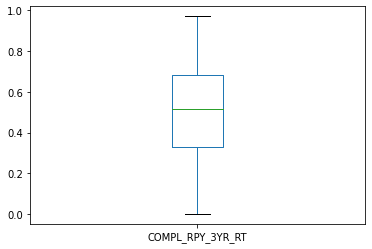

In [ ]:
SchoolDF_sub3['COMPL_RPY_3YR_RT'].plot.box()

Modelling

In [ ]:
X = SchoolDF_sub3.drop('COMPL_RPY_3YR_RT', axis=1)
y = SchoolDF_sub3['COMPL_RPY_3YR_RT']

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
rfr = RandomForestRegressor()

In [ ]:
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred = rfr.predict(X_valid)

In [ ]:
math.sqrt(mean_squared_error(y_pred, y_valid))

0.14380870996086548

In [ ]:
imp_feat = pd.DataFrame(X.columns, rfr.feature_importances_).reset_index().rename(columns={'index':'imp', 0:'feature'})[['feature', 'imp']].sort_values(by='imp', ascending=False).head(10)

In [ ]:
imp_feat

,feature,imp
10,MD_EARN_WNE_P8,0.457790
7,COMP_ORIG_YR4_RT,0.142291
6,AGE_ENTRY,0.106648
12,CDR3,0.064839
4,UGDS,0.046808
8,MEDIAN_HH_INC,0.036310
11,GRAD_DEBT_MDN,0.028587
5,UGDS_WOMEN,0.028450
13,ATDCOST,0.025355
9,PCTFLOAN,0.024534


In [ ]:
# pickle.dump(rfr, open('model', 'wb'))

In [ ]:
X_train_imp = X_train.loc[:,imp_feat.feature.tolist()]
X_valid_imp = X_valid.loc[:,imp_feat.feature.tolist()]

In [ ]:
rfr1 = RandomForestRegressor().fit(X_train_imp, y_train)

In [ ]:
y_pred1 = rfr1.predict(X_valid_imp)

In [ ]:
math.sqrt(mean_squared_error(y_pred1, y_valid))

0.1468700197568933

In [ ]:
pickle.dump(rfr1, open('model1.pkl', 'wb'))